<a href="https://colab.research.google.com/github/the-quantum-nargle/Qiskit-Lab-Experiments/blob/main/Experimental/Smart_OR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from ibm_quantum_widgets import CircuitComposer
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, transpile
from numpy import pi
simulator = Aer.get_backend('qasm_simulator')

#Creating custom OR Gate
#Input Qubits: 0,1
#Output Qubit: 2


OR = QuantumRegister(3)

circuit = QuantumCircuit(OR,name=' OR ')
circuit.cx(OR[0], OR[2])
circuit.cx(OR[1], OR[2])
circuit.ccx(OR[0], OR[1], OR[2])

or2 = circuit.to_instruction()

#DEBUG 
circuit.draw()


ModuleNotFoundError: ignored

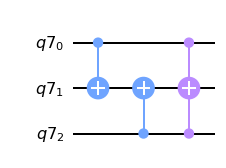

In [ ]:
from ibm_quantum_widgets import CircuitComposer
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, transpile
from numpy import pi
simulator = Aer.get_backend('qasm_simulator')

#Creating custom OR Gate alt version (to allow changing of temp var)
#Input Qubits: 0,2(this most likely from previous OR)
#Output Qubit

OR = QuantumRegister(3)

circuit = QuantumCircuit(OR,name=' OR ALt ')
circuit.cx(OR[0], OR[1])
circuit.cx(OR[2], OR[1])
circuit.ccx(OR[0], OR[2], OR[1])

or2Alt = circuit.to_instruction()

#DEBUG 
circuit.draw()


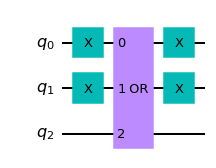

In [ ]:
#Example of circuit with both being used
qr = QuantumRegister(3, 'q')
circ = QuantumCircuit(qr)

#Input Qubits, 0,1
#So we can do whatever we want from qubit 0 and 1 before OR
#For example,

circ.x(qr[0])
circ.x(qr[1])

#Now we call q0 or q1 ~~ q2 (output) 
#And uncompute q0 q1
circ.append(or2, [qr[0], qr[1],qr[2]])
circ.x(qr[0])
circ.x(qr[1])


#after previous or, qubit q2 contains the output of q0 or q1.

circ.draw(output='mpl')

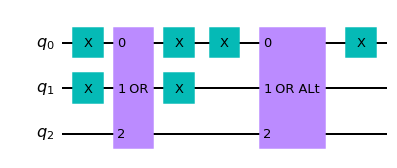

In [ ]:
#Now if we want to do another OR without increasing Qubits, we simply use OR-alt which uses q0,q2 as input.
#But since qubit q2 contains output from previous OR, so we are left with 1 input qubit which is q0

#So we may do whatever new computation we want on q0 now, 
circ.x(qr[0])

#Now we call or-alt  and uncompute q0
circ.append(or2Alt, [qr[0], qr[1],qr[2]])
circ.x(qr[0])

#Or-Alt uses q0 and q2(output from previous or) as input, and q1 as output
#Now we are free to use q0 again an the next input, and this cycle repeats


#IN ITHER OR VERSION Q0 IS ALWAYS AVAILABLE AS USER INPUT
#Unlike first or which takes 2 user inuts, consequtive ORs take 1 user input and 1 computed input from previous OR

circ.draw(output='mpl')

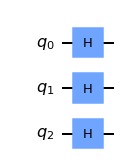

In [ ]:
#Example Loop 


#For (((A OR B) OR C) OR D) 
#In this case, A,b,c,d are all simply X gate computations 

#####################
#Given 2 inputs q0, q1
#####################
    #Do whatever computation here! Again for the example, I'll do X gate on both
    circ.x(qr[0])
    circ.x(qr[1])
    
                #todo make func to compute and uncompute
        
##### Simple input the 
    
    


qc = QuantumCircuit(3)
# Apply H-gate to each qubit:
for qubit in range(3):
    qc.h(qubit)
# See the circuit:
qc.draw()